In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-barzur.pkl", "rb") as pkl:
    load = pickle.load(pkl)
    their = load["their"]
    our = load["our"]
    data = load["data"]

print("their:", their["model"], their["mdp"], sep="\n")
print()
print("our:", our["model"], our["mdp"], sep="\n")
data = data.assign(rpp_minus_alpha=data.rpp - data.alpha)
data

their:
barzur20aft.Bitcoin(alpha=0.125, gamma=0.25, maximum_fork_length=13)
MDP of size 454 / 4 / 1722 / 3.8

our:
sm.SelfishMining(Bitcoin(), alpha=0.125, gamma=0.25, maximum_height=13, maximum_size=0, force_consider_own=True)
MDP of size 159819 / 4 / 846080 / 5.3


,alpha,gamma,horizon,eps,model,vi_discount,vi_delta,vi_stop_delta,vi_iter,vi_max_iter,...,vi_start_value,vi_max_value,ss_n,ss_nonzero,ss_time,rpp,rpp_iter,rpp_time,ptrev,rpp_minus_alpha
0,0.05,0.0,50,0.01,their,1,0.009811,0.01,159,0,...,1.993567,14.532848,5,4,0.000629,0.050000,2,0.002137,1.998473,-3.053113e-16
1,0.05,0.0,50,0.01,our,1,0.009932,0.01,162,0,...,2.003378,14.620646,176,175,0.002010,0.050000,2,0.062662,2.013310,-2.169098e-14
2,0.40,0.0,100,0.01,their,1,0.009959,0.01,624,0,...,46.450850,59.065075,200,200,0.002907,0.481369,2,0.086433,47.502730,8.136879e-02
3,0.40,0.0,100,0.01,our,1,0.009962,0.01,726,0,...,46.002526,58.501317,912,912,0.062809,0.481369,2,0.314776,47.287615,8.136879e-02
4,0.35,1.0,25,0.01,their,1,0.009887,0.01,181,0,...,13.157600,21.848285,262,262,0.004403,0.535209,2,0.105188,14.396564,1.852088e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.30,0.0,100,0.01,our,1,0.009942,0.01,680,0,...,29.005849,41.897931,295,295,0.004942,0.300000,2,0.100520,29.015791,6.052936e-13
266,0.10,0.5,50,0.01,their,1,0.009881,0.01,221,0,...,4.459156,16.771242,137,137,0.001356,0.100000,2,0.053831,4.464096,5.376255e-14
267,0.10,0.5,50,0.01,our,1,0.009995,0.01,230,0,...,4.500262,16.868644,420,420,0.009676,0.100000,2,0.135717,4.510256,6.157852e-13
268,0.45,0.5,25,0.01,their,1,0.009876,0.01,180,0,...,16.268643,23.985824,242,242,0.003102,0.643667,2,0.095652,18.271259,1.936670e-01


In [3]:
data[(data.ss_n - data.ss_nonzero) != 0]

,alpha,gamma,horizon,eps,model,vi_discount,vi_delta,vi_stop_delta,vi_iter,vi_max_iter,...,vi_start_value,vi_max_value,ss_n,ss_nonzero,ss_time,rpp,rpp_iter,rpp_time,ptrev,rpp_minus_alpha
0,0.05,0.00,50,0.01,their,1,0.009811,0.01,159,0,...,1.993567,14.532848,5,4,0.000629,0.05,2,0.002137,1.998473,-3.053113e-16
1,0.05,0.00,50,0.01,our,1,0.009932,0.01,162,0,...,2.003378,14.620646,176,175,0.002010,0.05,2,0.062662,2.013310,-2.169098e-14
62,0.05,0.25,25,0.01,their,1,0.009612,0.01,81,0,...,1.005949,13.591608,5,4,0.000525,0.05,2,0.002119,1.010755,-3.053113e-16
80,0.15,0.50,25,0.01,their,1,0.009857,0.01,127,0,...,3.465106,15.037238,5,4,0.000809,0.15,2,0.003393,3.470035,5.551115e-17
120,0.15,0.75,25,0.01,their,1,0.009857,0.01,127,0,...,3.465106,15.037238,5,4,0.000537,0.15,2,0.002116,3.470035,5.551115e-17
128,0.05,0.50,50,0.01,their,1,0.009811,0.01,159,0,...,1.993567,14.532848,5,4,0.000557,0.05,2,0.002084,1.998473,-3.053113e-16
136,0.05,0.75,25,0.01,their,1,0.009612,0.01,81,0,...,1.005949,13.591608,5,4,0.000480,0.05,2,0.002163,1.010755,-3.053113e-16
140,0.05,0.50,25,0.01,their,1,0.009612,0.01,81,0,...,1.005949,13.591608,5,4,0.000500,0.05,2,0.002048,1.010755,-3.053113e-16
178,0.05,0.75,50,0.01,their,1,0.009811,0.01,159,0,...,1.993567,14.532848,5,4,0.000520,0.05,2,0.002025,1.998473,-3.053113e-16
198,0.15,0.00,25,0.01,their,1,0.009857,0.01,127,0,...,3.465106,15.037238,5,4,0.000506,0.15,2,0.002066,3.470035,5.551115e-17


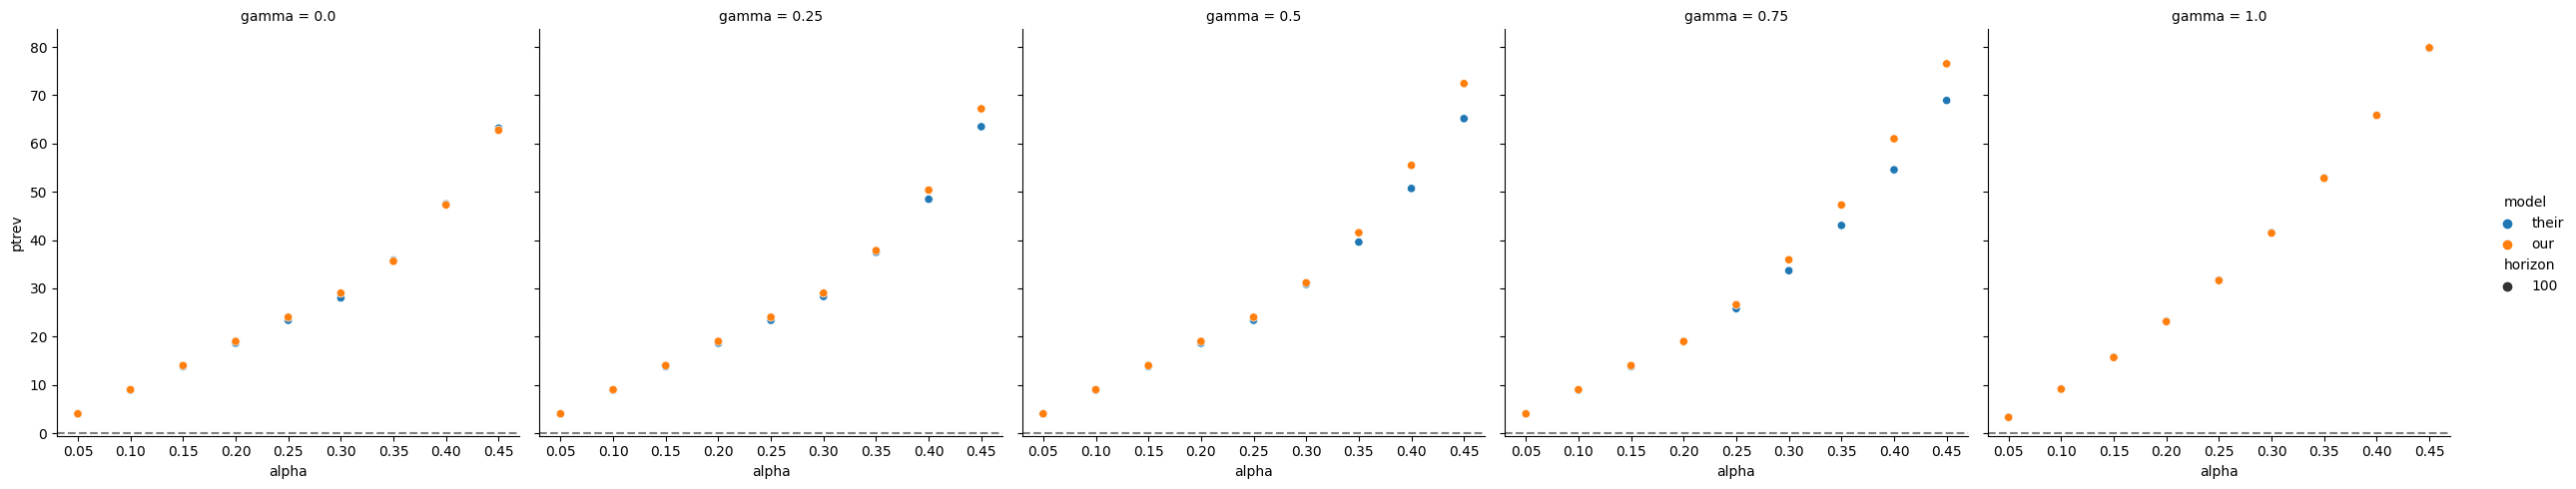

In [4]:
# Compare model w.r.t. reward
sns.relplot(
    data.query("horizon==horizon.max() and eps==eps.min()"),
    x="alpha",
    y="ptrev",
    col="gamma",
    style="horizon",
    hue="model",
).refline(y=0)

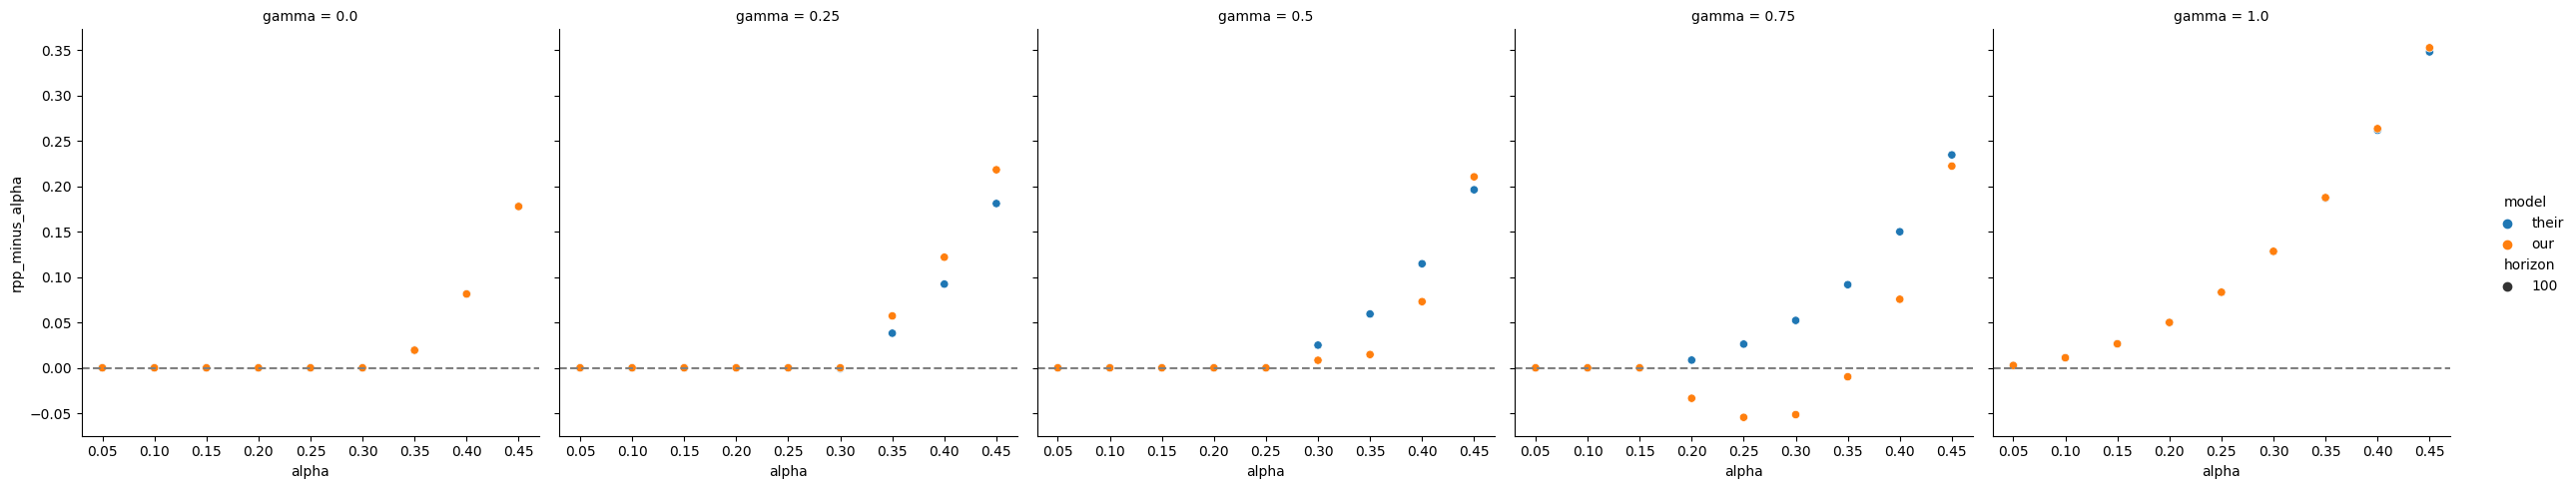

In [5]:
# Compare model w.r.t. reward
sns.relplot(
    data.query("horizon==horizon.max() and eps==eps.min()"),
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    style="horizon",
    hue="model",
).refline(y=0)

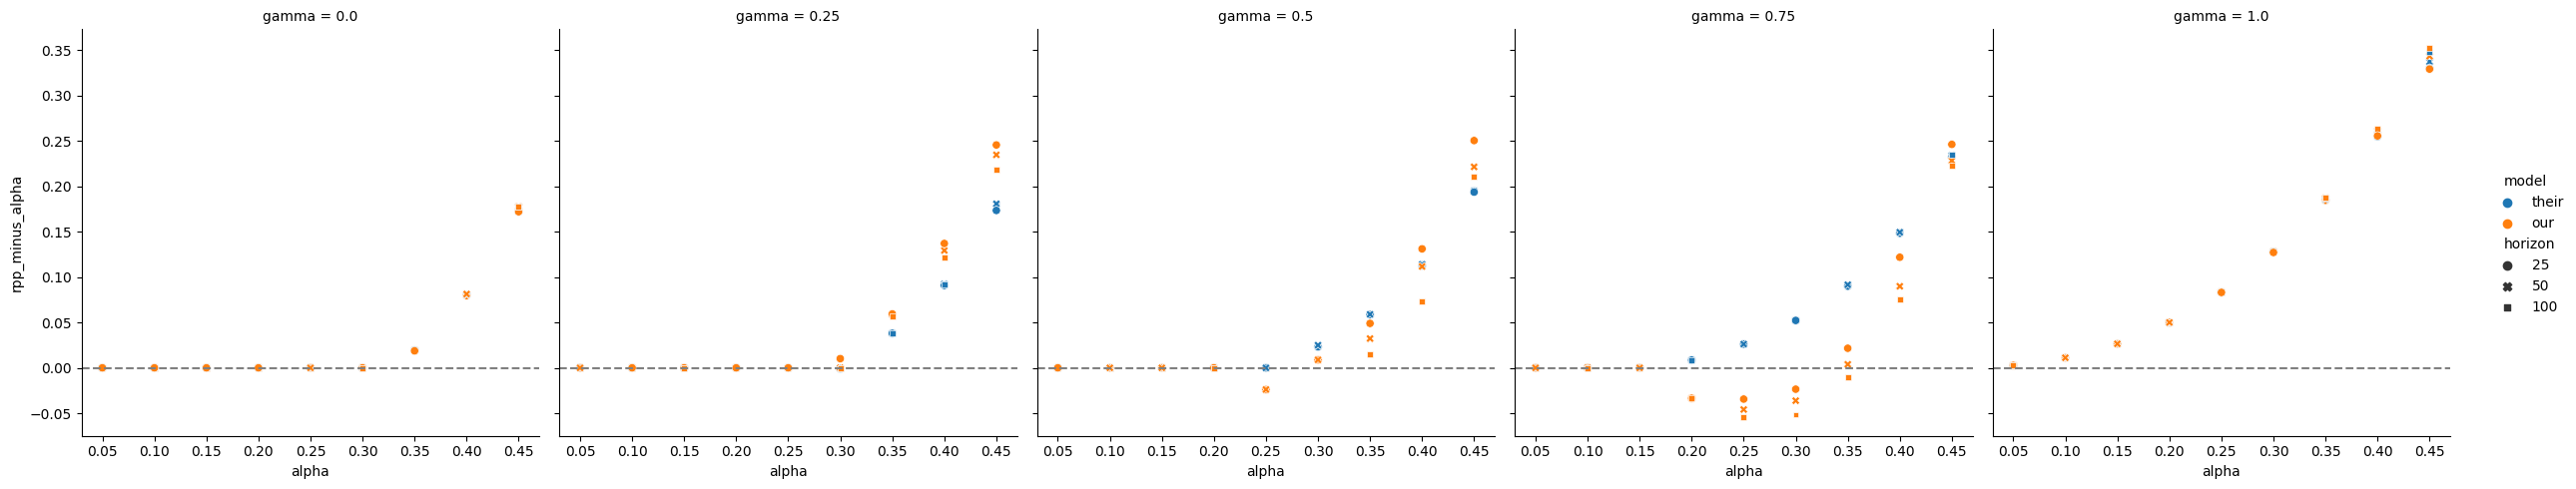

In [6]:
# Demonstrate effect of horizon
sns.relplot(
    data.query("eps==eps.min()"),
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    hue="model",
    style="horizon",
).refline(y=0)

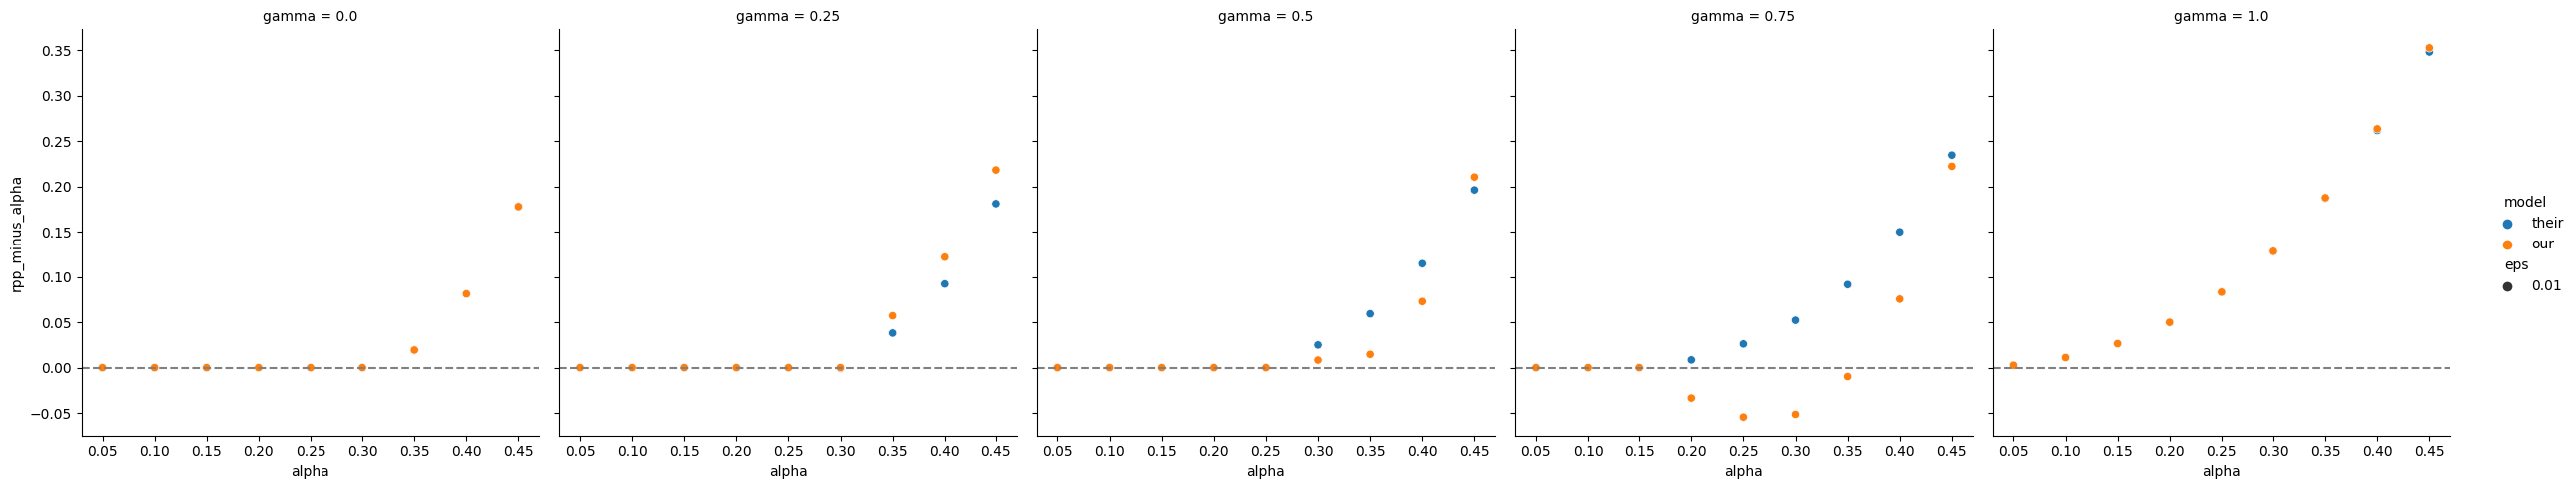

In [7]:
# Demonstrate effect of eps
sns.relplot(
    data.query("horizon==horizon.max()"),
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    hue="model",
    style="eps",
).refline(y=0)

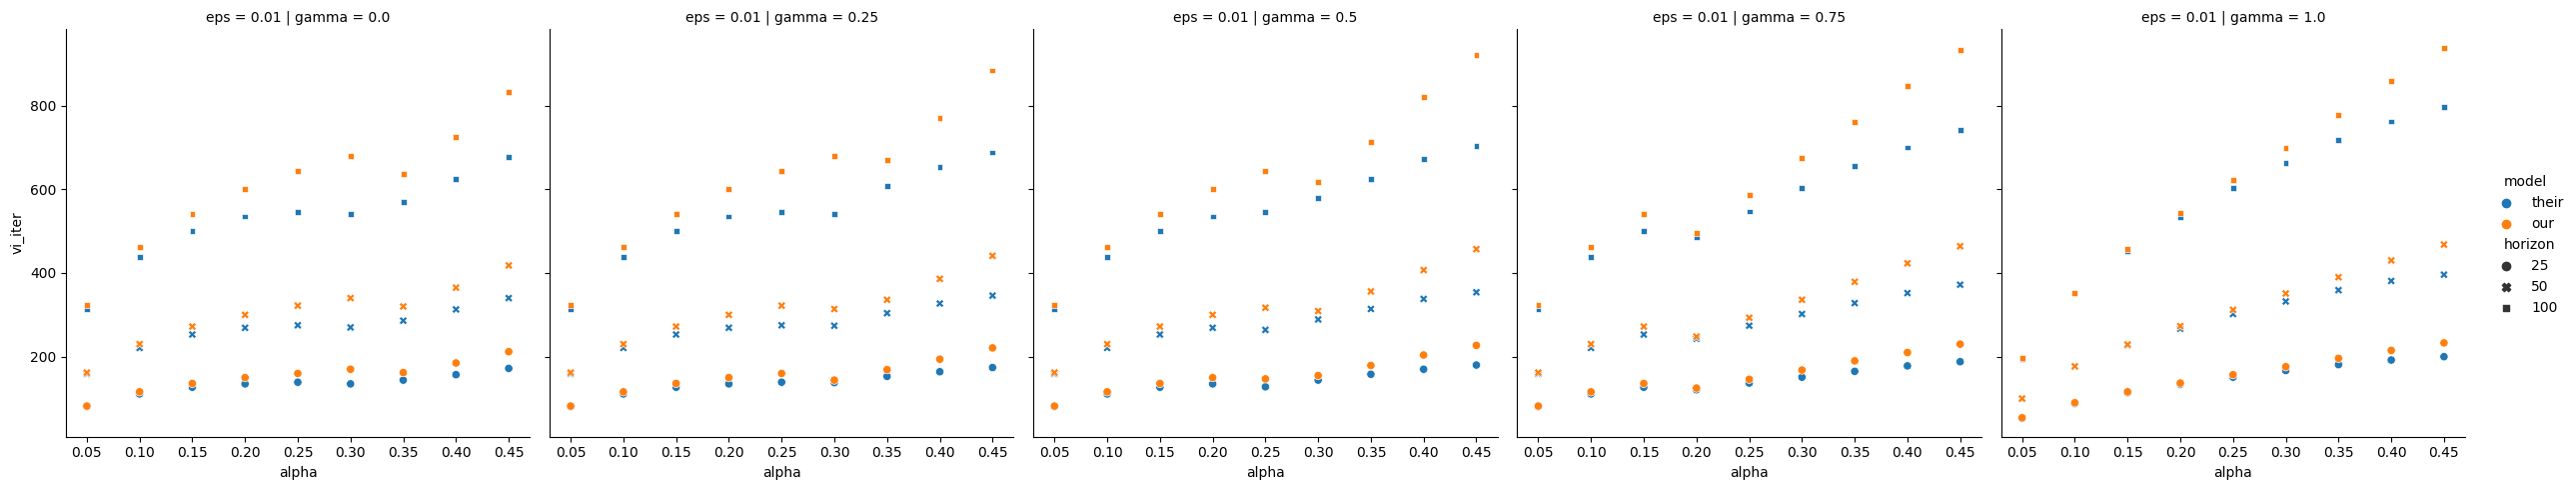

In [8]:
# Visualize number iterations required in value iteration
# It's intersting that the models behave so similar!
sns.relplot(
    data,
    x="alpha",
    y="vi_iter",
    col="gamma",
    hue="model",
    row="eps",
    style="horizon",
)

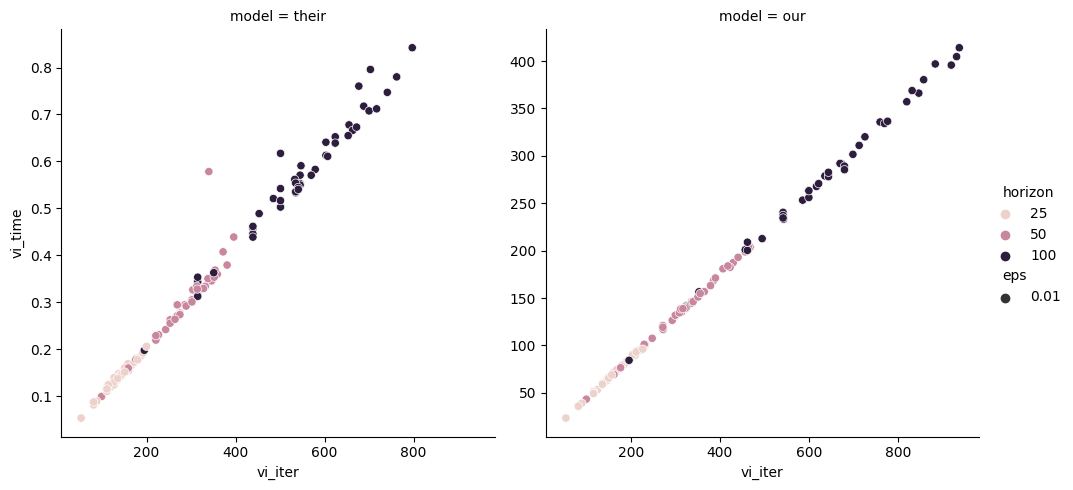

In [9]:
# Visualize solving time
# Naturally, the smaller model can be iterated much faster
sns.relplot(
    data,
    x="vi_iter",
    y="vi_time",
    hue="horizon",
    style="eps",
    col="model",
    facet_kws=dict(sharey=False),
)

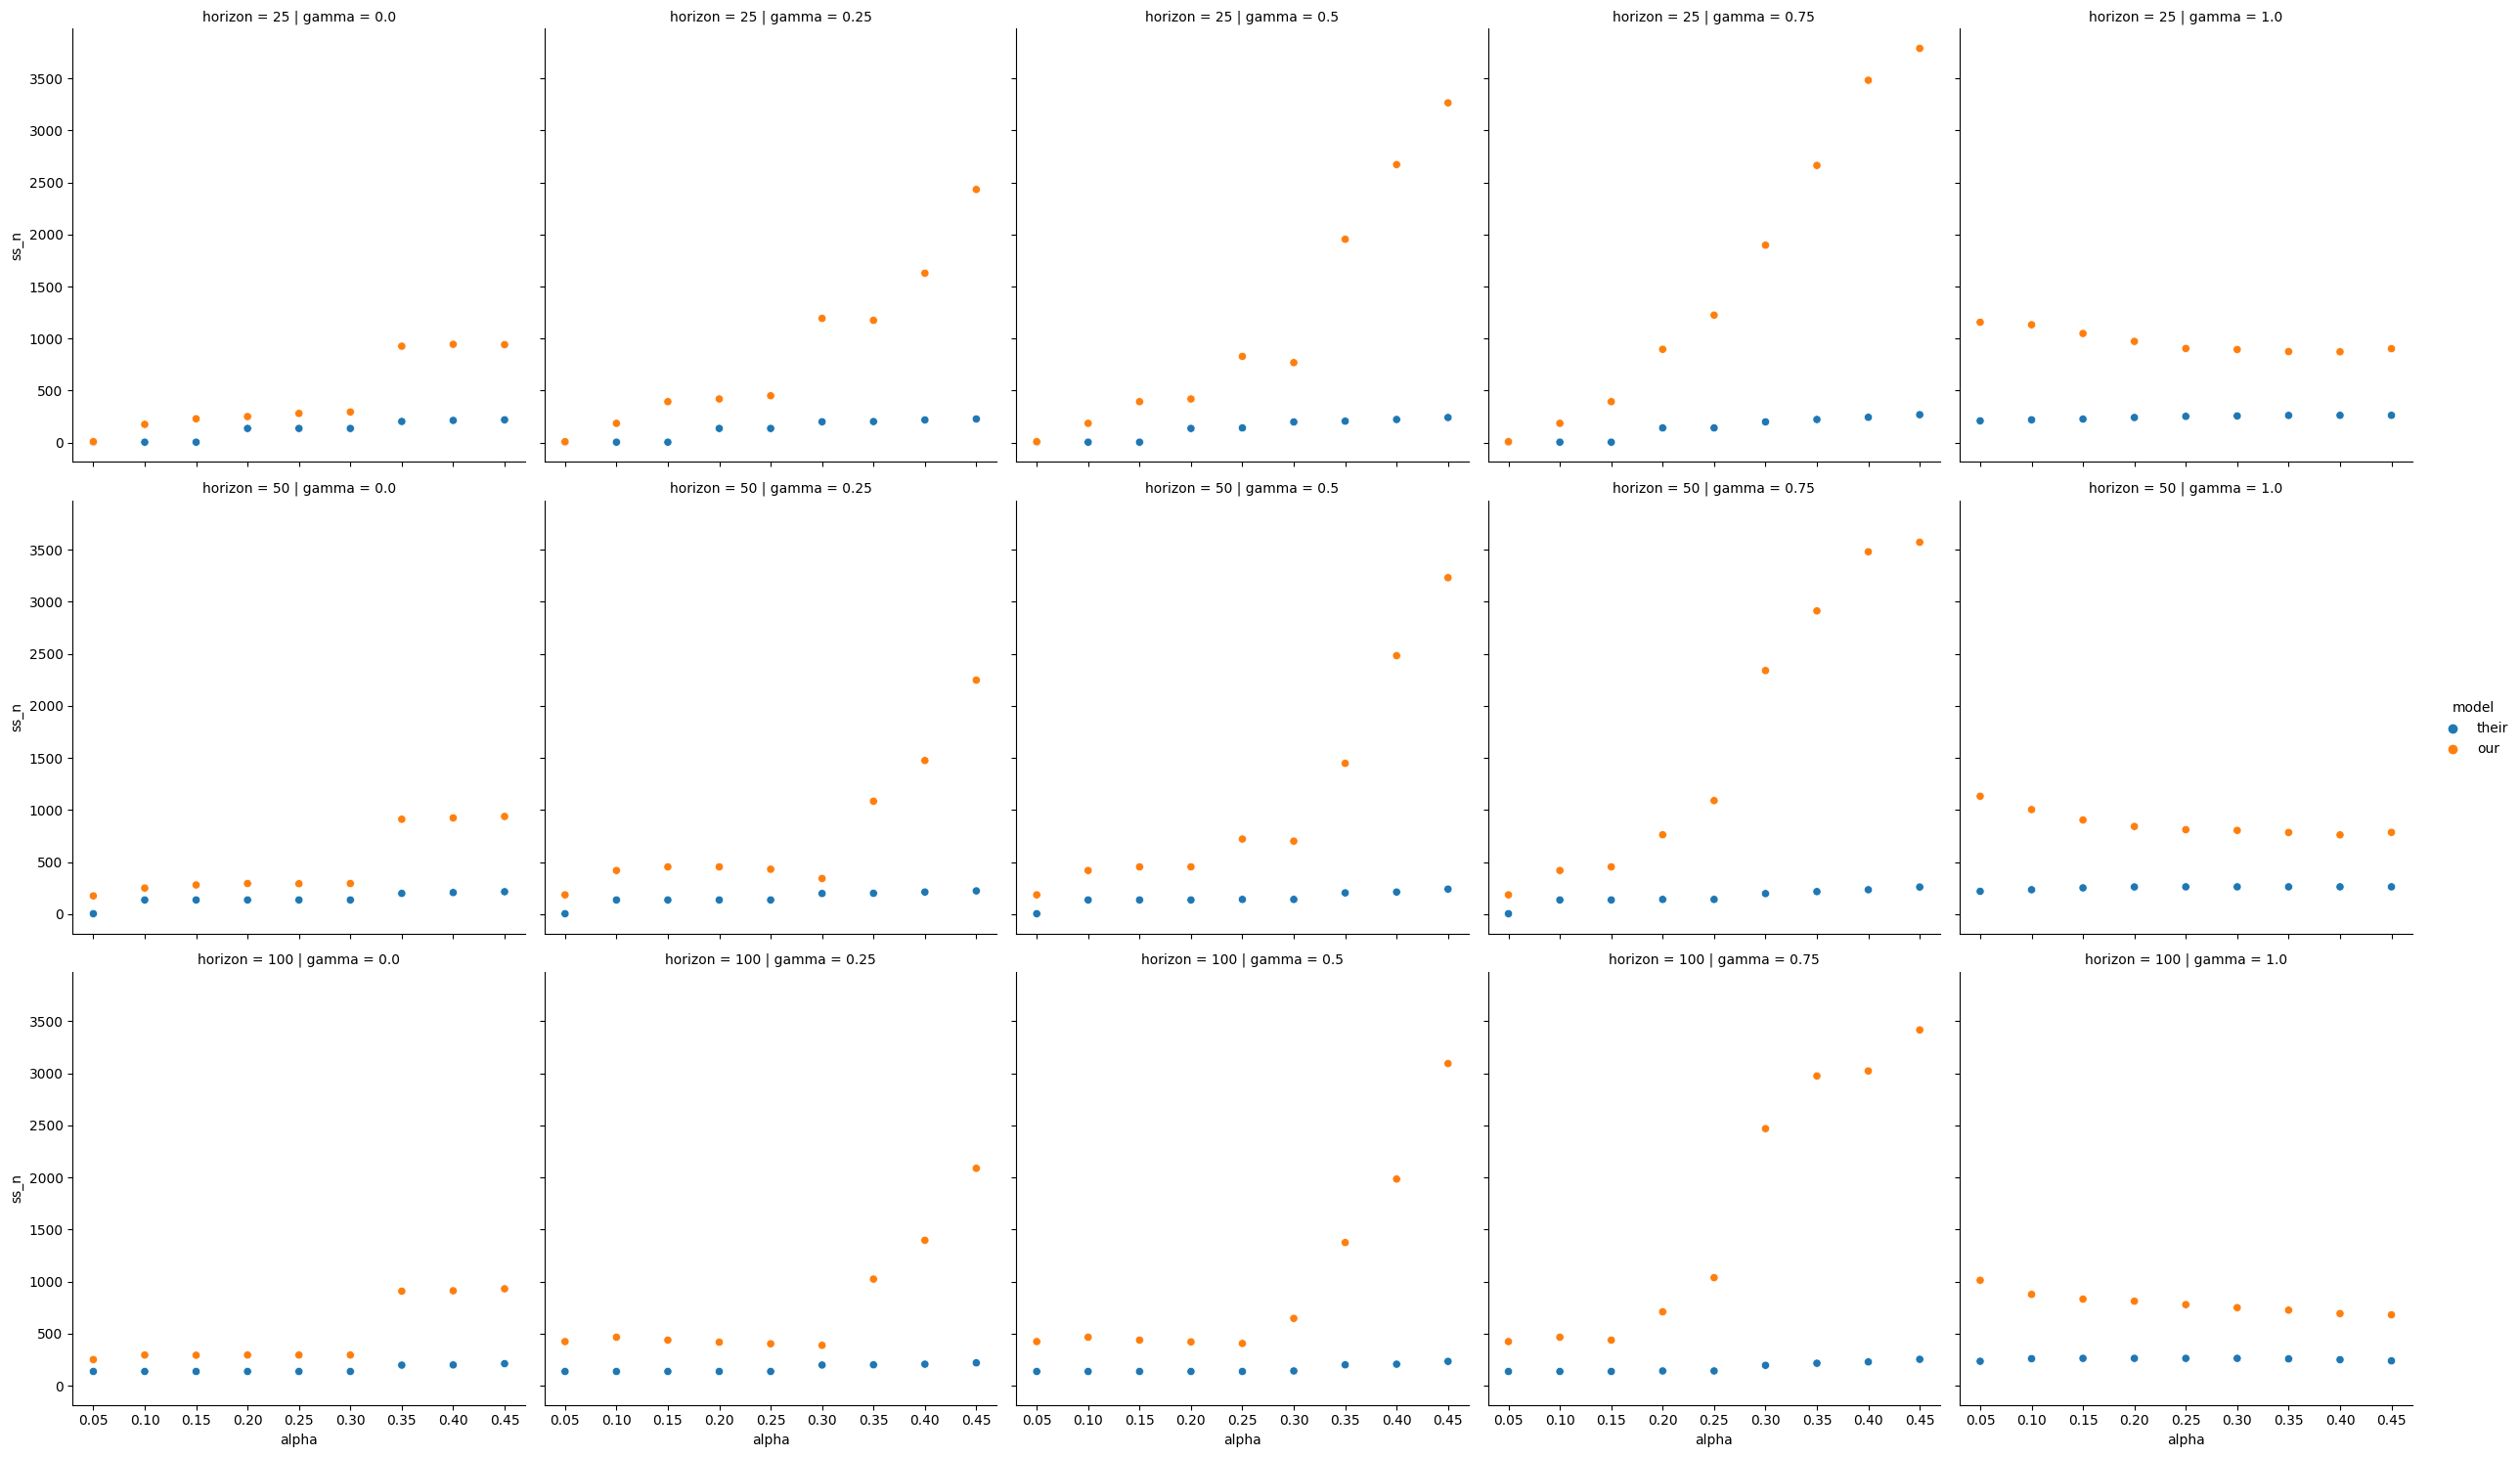

In [10]:
# Size of policy / steady state
sns.relplot(
    data,
    x="alpha",
    y="ss_n",
    col="gamma",
    row="horizon",
    hue="model",
)

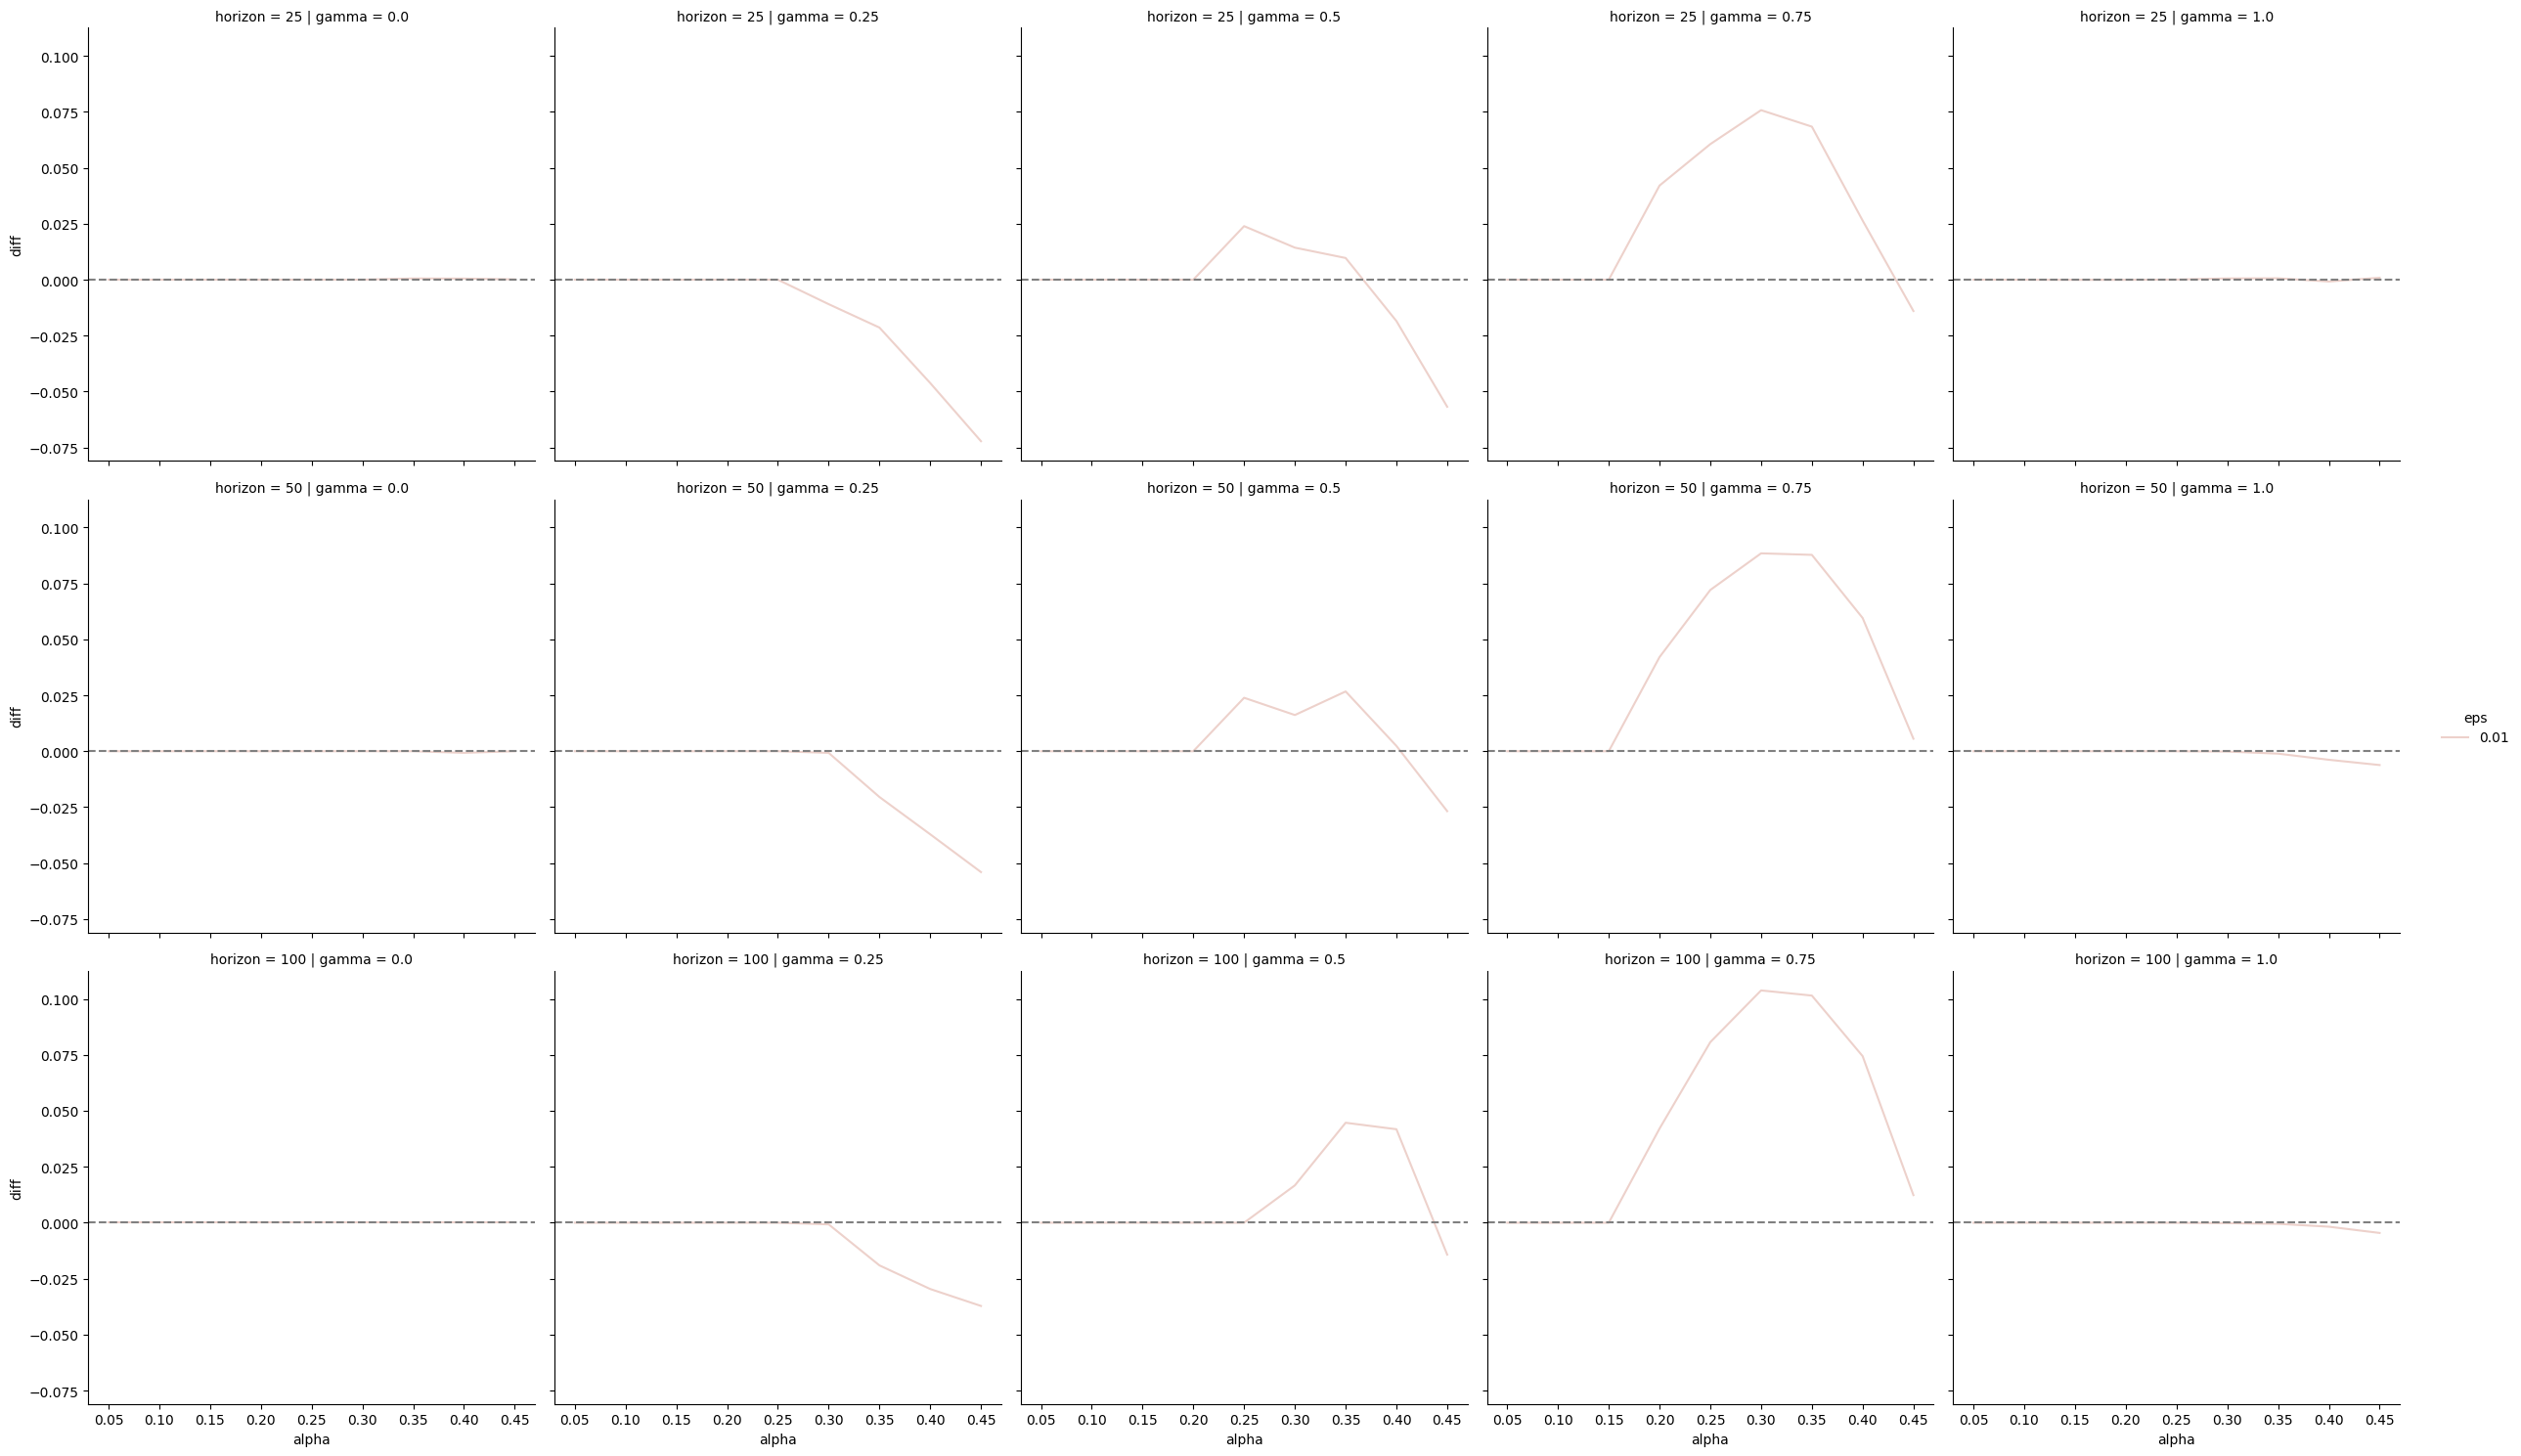

In [11]:
# We're now interested in the difference between the models
# Can we bring the differnce down by selecting better hyper params?
diff = data.pivot(
    index=["alpha", "gamma", "horizon", "eps"], columns="model", values=["rpp"]
)
diff.columns = [j for i, j in diff.columns]
diff["diff"] = diff.their - diff.our
diff = diff.reset_index()
sns.relplot(
    kind="line",
    data=diff,
    x="alpha",
    y="diff",
    row="horizon",
    col="gamma",
    hue="eps",
).refline(y=0)